# Info
Name:  

    SEAC4RS_cld_compare_v5_small

Purpose:  

    Python script to simplify the SEAC4RS_compare_v5 script. 
    Used for making the figures in the paper:
        Comparing Cloud properties and radiative effect estimated from airborne measurements of transmitted and reflected light
        LeBlanc et al., JGR 

Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - run_kisq_retrieval.py : for the retrieval functions
    - load_utils.py : for loading modis files
    - matplotlib
    - mpltools
    - numpy
    - plotly : optional
    - scipy : for saving and reading
    - math
    - os
    - gc
    - pdb
    - datetime
    - pyhdf
    - mpl_toolkits
    - gdal (from osgeo)
    - plotting_utils (user defined plotting routines)
    - map_utils, dependent on geopy
    - hdf5storage
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - sp_v3_20130913_4STAR.out: modeled spectra output for SEAC4RS at sza 17.9, idl save file
  - %%20130219starzen_rad.mat : special zenith radiance 4star matlab file 
  - ict files from 20130913
  
Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2016-11-11
             ported from SEAC4RS_compare_v5

# Load the required python modules

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color

import numpy as np
import scipy.io as sio
import math
import os
import Sp_parameters as Sp

import hdf5storage as hs
from load_utils import mat2py_time, toutc, load_ict

from Sp_parameters import smooth
import cPickle as pickle


In [2]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
# set the basic directory path
fp='C:/Users/sleblan2/Research/SEAC4RS/'

In [8]:
vv = 'v6'

# Load some files for easier processing

## get the retrieval results

In [4]:
m_dict = hs.loadmat(fp+'20130913_retrieval_output.mat')

In [5]:
m_dict.keys()

[u'modis', u'emas', u'star', u'time_created', u'goes', u'rsp', u'ssfr']

In [6]:
if not 'emas_tau_full' in vars():
    print 'not defined, loading from file'
    emas_tau_full = m_dict['emas'][1]; emas_ref_full = m_dict['emas'][3]; emas_utc_full = m_dict['emas'][5]
    modis_tau = m_dict['modis'][1]; modis_ref = m_dict['modis'][3]
    ssfr_tau = m_dict['ssfr'][1]; ssfr_ref = m_dict['ssfr'][3]; ssfr_utc = m_dict['ssfr'][5]
    rsp_tau = m_dict['rsp'][1]; rsp_ref = m_dict['rsp'][3]; rsp_utc = m_dict['rsp'][5]
    star_tau = m_dict['star'][1]; star_ref = m_dict['star'][3]
    goes_tau = m_dict['goes'][1]; goes_ref = m_dict['goes'][3]
    goes_utc = m_dict['goes'][5]; star_utc = m_dict['star'][5]

not defined, loading from file


## Now get the variability

In [12]:
if not 'stats' in vars():
    stats = pickle.load(open(fp+'20130913_stats_output.p',"rb"))

In [13]:
stats.keys()

['ssfr_tau',
 'modis_ref',
 'dc8_utc',
 'dc8_lon',
 'ssfr_ref',
 'rsp_ref',
 'er2_lat',
 'modis_tau',
 'star_tau',
 'goes_ref',
 'er2_utc',
 'star_ref',
 'rsp_tau',
 'er2_lon',
 'goes_tau',
 'dc8_lat']

In [14]:
er2_utc = stats['er2_utc']

In [15]:
stats['modis_tau'].keys()

[u'std', u'index', u'range', u'median', u'mean']

## Calculate some values based on the stats

In [16]:
from scipy import interpolate

In [17]:
# Do the tau
modis_tau_stdfx = interpolate.interp1d(er2_utc,stats['modis_tau']['std'],bounds_error=False)
modis_tau_std = modis_tau_stdfx(star_utc)
modis_tau_std[np.isnan(modis_tau_std)] = np.mean(stats['modis_tau']['std'])

#emas_tau_stdfx = interpolate.interp1d(er2_utc,stats['emas_tau']['std'],bounds_error=False)
#emas_tau_std = emas_tau_stdfx(emas_utc_full)

ssfr_tau_stdfx = interpolate.interp1d(er2_utc,stats['ssfr_tau']['std'],bounds_error=False)
ssfr_tau_std = ssfr_tau_stdfx(ssfr_utc)
ssfr_tau_std[np.isnan(ssfr_tau_std)] = np.mean(stats['ssfr_tau']['std'])

rsp_tau_stdfx = interpolate.interp1d(er2_utc,stats['rsp_tau']['std'],bounds_error=False)
rsp_tau_std = rsp_tau_stdfx(rsp_utc)
rsp_tau_std[np.isnan(rsp_tau_std)] = np.mean(stats['rsp_tau']['std'])

goes_tau_stdfx = interpolate.interp1d(er2_utc,stats['goes_tau']['std'],bounds_error=False)
goes_tau_std = goes_tau_stdfx(goes_utc)
goes_tau_std[np.isnan(goes_tau_std)] = np.mean(stats['goes_tau']['std'])

star_tau_stdfx = interpolate.interp1d(er2_utc,stats['star_tau']['std'],bounds_error=False)
star_tau_std = star_tau_stdfx(star_utc)
star_tau_std[np.isnan(star_tau_std)] = np.mean(stats['star_tau']['std'])

In [19]:
# Do the ref
modis_ref_stdfx = interpolate.interp1d(er2_utc,stats['modis_ref']['std'],bounds_error=False)
modis_ref_std = modis_ref_stdfx(star_utc)
modis_ref_std[np.isnan(modis_ref_std)] = np.mean(stats['modis_ref']['std'])

#emas_ref_stdfx = interpolate.interp1d(er2_utc,stats['emas_ref']['std'],bounds_error=False)
#emas_ref_std = emas_ref_stdfx(emas_utc_full)

ssfr_ref_stdfx = interpolate.interp1d(er2_utc,stats['ssfr_ref']['std'],bounds_error=False)
ssfr_ref_std = ssfr_ref_stdfx(ssfr_utc)
ssfr_ref_std[np.isnan(ssfr_ref_std)] = np.mean(stats['ssfr_ref']['std'])

rsp_ref_stdfx = interpolate.interp1d(er2_utc,stats['rsp_ref']['std'],bounds_error=False)
rsp_ref_std = rsp_ref_stdfx(rsp_utc)
rsp_ref_std[np.isnan(rsp_ref_std)] = np.mean(stats['rsp_ref']['std'])

goes_ref_stdfx = interpolate.interp1d(er2_utc,stats['goes_ref']['std'],bounds_error=False)
goes_ref_std = goes_ref_stdfx(goes_utc)
goes_ref_std[np.isnan(goes_ref_std)] = np.mean(stats['goes_ref']['std'])

star_ref_stdfx = interpolate.interp1d(er2_utc,stats['star_ref']['std'],bounds_error=False)
star_ref_std = star_ref_stdfx(star_utc)
star_ref_std[np.isnan(star_ref_std)] = np.mean(stats['star_ref']['std'])

## Load the CPL layers data

In [30]:
cpl_layer_file = fp+'er2\\20130913\\layers_13965_13sep13.txt'
import load_utils as lm
reload(lm)
from load_utils import load_cpl_layers
cpl_layers = load_cpl_layers(cpl_layer_file)

In [33]:
cpl_layers.dtype.names

('hh',
 'mm',
 'ss',
 'lat',
 'lon',
 'alt',
 'rol',
 'num',
 'gh',
 'top',
 'bot',
 'type',
 'utc')

## Load the APR data

In [37]:
fa = fp+'dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913'
fe = '_R23.h4'
files = ['180527','181019','182329','184933','190145','192149','194031']
aprfiles = [fa+s+fe for s in files]

In [261]:
import load_utils as lu

In [38]:
from load_utils import load_apr
apr = load_apr(aprfiles)

Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913180527_R23.h4
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913181019_R23.h4
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913182329_R23.h4
swaping axes
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913184933_R23.h4
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913190145_R23.h4
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913192149_R23.h4
Running file:  C:/Users/sleblan2/Research/SEAC4RS/dc8/20130913//SEAC4RS-APR2_DC8_20130913/SEAC4RS-APR2_DC8_20130913194031_R23.h4
['altflt', 'lonz', 'dbz', 'utc', 'latz']
Loaded data points:  (3207L,)


## Load the 2DS data for effective radius

In [42]:
twoDS = load_ict(fp+'dc8/20130913/seac4rs-2DS_DC8_20130913_R0.ict')

('Start_UTC', 'sv', 'conc', 'ext', 'iwc', 'irregularCNT', 'meanD', 'medianvolD', 'effectiveD', 'nbin01', 'nbin02', 'nbin03', 'nbin04', 'nbin05', 'nbin06', 'nbin07', 'nbin08', 'nbin09', 'nbin10', 'nbin11', 'nbin12', 'nbin13', 'nbin14', 'nbin15', 'nbin16', 'nbin17', 'nbin18', 'nbin19', 'nbin20', 'nbin21', 'nbin22', 'nbin23', 'nbin24', 'nbin25', 'nbin26', 'nbin27', 'nbin28', 'nbin29', 'nbin30', 'nbin31', 'nbin32', 'nbin33', 'nbin34', 'nbin35', 'nbin36', 'nbin37', 'nbin38', 'nbin39', 'nbin40', 'nbin41', 'nbin42', 'nbin43', 'nbin44', 'nbin45', 'nbin46', 'nbin47', 'nbin48', 'nbin49', 'nbin50', 'nbin51', 'nbin52', 'nbin53', 'nbin54', 'nbin55', 'nbin56', 'nbin57', 'nbin58', 'nbin59', 'nbin60', 'nbin61', 'abin01', 'abin02', 'abin03', 'abin04', 'abin05', 'abin06', 'abin07', 'abin08', 'abin09', 'abin10', 'abin11', 'abin12', 'abin13', 'abin14', 'abin15', 'abin16', 'abin17', 'abin18', 'abin19', 'abin20', 'abin21', 'abin22', 'abin23', 'abin24', 'abin25', 'abin26', 'abin27', 'abin28', 'abin29', 'abin

In [129]:
# filter the data and only show a part
twoDS['effectiveD'][twoDS['effectiveD']<0] = np.nan
fl = np.where((twoDS['Start_UTC'] > 18.025) & (twoDS['Start_UTC'] < 19.45) & (twoDS['effectiveD'] > 5.0))

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


## Load the HVPS data for effective radius (second in situ method)

In [43]:
hvps = load_ict(fp+'dc8/20130913/SEAC4RS-HVPS_DC8_20130913_R0.ict')

('Start_UTC', 'sv', 'conc', 'ext', 'iwc', 'irregularCNT', 'meanD', 'medianvolD', 'effectiveD', 'nbin01', 'nbin02', 'nbin03', 'nbin04', 'nbin05', 'nbin06', 'nbin07', 'nbin08', 'nbin09', 'nbin10', 'nbin11', 'nbin12', 'nbin13', 'nbin14', 'nbin15', 'nbin16', 'nbin17', 'nbin18', 'nbin19', 'nbin20', 'nbin21', 'nbin22', 'nbin23', 'nbin24', 'nbin25', 'nbin26', 'nbin27', 'nbin28', 'nbin29', 'nbin30', 'nbin31', 'nbin32', 'nbin33', 'nbin34', 'nbin35', 'nbin36', 'nbin37', 'nbin38', 'nbin39', 'nbin40', 'nbin41', 'nbin42', 'nbin43', 'nbin44', 'nbin45', 'nbin46', 'nbin47', 'nbin48', 'nbin49', 'nbin50', 'nbin51', 'nbin52', 'nbin53', 'nbin54', 'nbin55', 'nbin56', 'nbin57', 'nbin58', 'nbin59', 'nbin60', 'nbin61', 'abin01', 'abin02', 'abin03', 'abin04', 'abin05', 'abin06', 'abin07', 'abin08', 'abin09', 'abin10', 'abin11', 'abin12', 'abin13', 'abin14', 'abin15', 'abin16', 'abin17', 'abin18', 'abin19', 'abin20', 'abin21', 'abin22', 'abin23', 'abin24', 'abin25', 'abin26', 'abin27', 'abin28', 'abin29', 'abin

## Load the FCDP data

In [71]:
fcdp_in,fcdp_header = load_ict(fp+'dc8/20130913/Seac4rs-FCDP_DC8_20130913_R0.ict',return_header=True)

('Start_UTC', 'conc', 'ext', 'lwc', 'sv', 'CNT', 'cbin01', 'cbin02', 'cbin03', 'cbin04', 'cbin05', 'cbin06', 'cbin07', 'cbin08', 'cbin09', 'cbin10', 'cbin11', 'cbin12', 'cbin13', 'cbin14', 'cbin15', 'cbin16', 'cbin17', 'cbin18', 'cbin19', 'cbin20', 'cbin21', 'nbin01', 'nbin02', 'nbin03', 'nbin04', 'nbin05', 'nbin06', 'nbin07', 'nbin08', 'nbin09', 'nbin10', 'nbin11', 'nbin12', 'nbin13', 'nbin14', 'nbin15', 'nbin16', 'nbin17', 'nbin18', 'nbin19', 'nbin20', 'nbin21')


In [72]:
fcdp_header

['78, 1001\n',
 'Lawson, Paul\n',
 'Spec Inc\n',
 'FCDP on DC8\n',
 'SEAC4RS\n',
 '1, 1\n',
 '2013,09,13,2015,3,5\n',
 '1\n',
 'Start_UTC, seconds, elapsed time from 00:00:00 UTC\n',
 '47\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002,-9.99e+002\n',
 'conc, #/L, particle number concentration\n',
 'ext,  1/km,  extinction of the particles\n',
 'lwc, g/m^3,   liquid water content\n',
 'sv, liter, sample volume\n',
 'CNT, #, accepted 

### Now from the FCDP distributions, calculate the effectve radius

In [73]:
fcdp = {key: fcdp_in[key] for key in fcdp_in.dtype.names}

In [74]:
fcdp['dr_m'] = np.array([0.0,1.0,3.2,9.4,12.0,15.6,17.7,19.8,22.4,25.8,28.8,30.9,32.7,34.4,36.4,38.7,41.3,42.9,44.7,47.1,50.0])
fcdp['dr_p'] = np.array([1.0,3.2,9.4,12.0,15.6,17.7,19.8,22.4,25.8,28.8,30.9,32.7,34.4,36.4,38.7,41.3,42.9,44.7,47.1,50.0,100.0])

In [75]:
fcdp['dr'] = fcdp['dr_p']-fcdp['dr_m']

In [78]:
fcdp['mean_r'] = (fcdp['dr_p']+fcdp['dr_m'])/2.0

In [94]:
fcdp['effD'] = np.zeros_like(fcdp['Start_UTC'])

In [82]:
fcdp['bin_names'] = np.sort([k for k in fcdp.keys() if 'nbin' in k])

In [85]:
fcdp['n_r'] = []
for n in fcdp['bin_names']:
    fcdp['n_r'].append(fcdp[n])
fcdp['n_r'] = np.array(fcdp['n_r'])

In [86]:
fcdp['n_r'].shape

(21L, 29221L)

In [202]:
for i in xrange(len(fcdp['Start_UTC'])):
    top = fcdp['mean_r']**3.0*fcdp['n_r'][:,i]*fcdp['dr']
    bot = fcdp['mean_r']**2.0*fcdp['n_r'][:,i]*fcdp['dr']
    if fcdp['CNT'][i] >5:
        fcdp['effD'][i] = np.sum(top)/np.sum(bot)
    else:
        fcdp['effD'][i] = np.nan

## Load the DC8 nav data

In [47]:
dc8,dc8_header = load_ict(fp+'dc8/20130913/SEAC4RS-MMS-1HZ_DC8_20130913_R0.ict',return_header=True)

Some Scaling factors are not equal to one, Please check the factors:
[0.01, 0.01, 0.01, 0.01, 0.01, 0.001, 0.01, 0.01, 1e-05, 1e-05, 0.1, 0.01, 0.01, 0.01, 0.01]
('TIME_UTC', 'P', 'T', 'TAS', 'U', 'V', 'W', 'TEDR', 'REYN', 'G_LAT', 'G_LONG', 'G_ALT', 'POT', 'ROLL', 'HDG', 'PITCH')


# Now make a plot of the time series for easier referencing

<IPython.core.display.Javascript object>


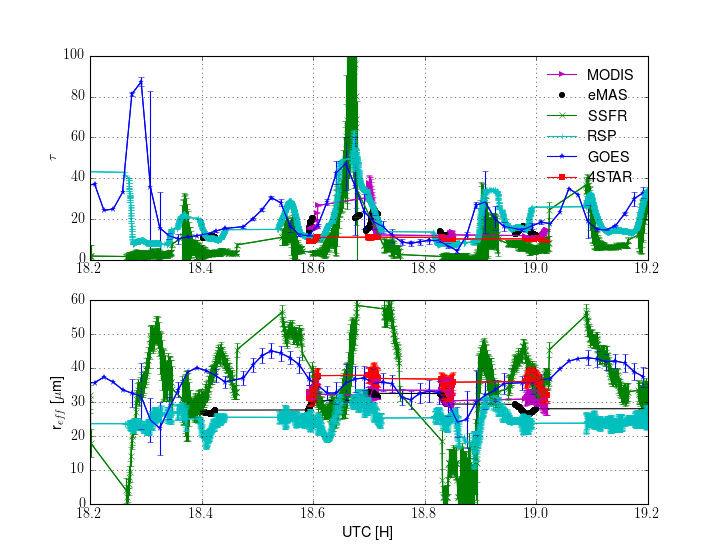

In [25]:
plt.figure(figsize=(9,7))
ax1 = plt.subplot(211)
ax1.plot(star_utc,smooth(modis_tau,6),'m->',label='MODIS',markeredgecolor='none')
ax1.plot(emas_utc_full,smooth(emas_tau_full,60),'ko',label='eMAS',markeredgecolor='none')
ax1.plot(ssfr_utc,smooth(ssfr_tau,2),'g-x',label='SSFR')
ax1.plot(rsp_utc,smooth(rsp_tau,70),'c-+',label='RSP')
ax1.plot(goes_utc,smooth(goes_tau,2),'b-*',label='GOES',markeredgecolor='none')
ax1.plot(star_utc,smooth(star_tau,40),'r-s',label='4STAR',markeredgecolor='none')

ax1.errorbar(star_utc,smooth(modis_tau,6),yerr=modis_tau_std*2.0,color='m')
ax1.errorbar(ssfr_utc,smooth(ssfr_tau,2),yerr=ssfr_tau_std*2.0,color='g')
ax1.errorbar(rsp_utc,smooth(rsp_tau,70),yerr=rsp_tau_std*2.0,color='c')
ax1.errorbar(goes_utc,smooth(goes_tau,2),yerr=goes_tau_std*2.0,color='b')
ax1.errorbar(star_utc,smooth(star_tau,40),yerr=star_tau_std*2.0,color='r')

ax1.legend(frameon=False,numpoints=1)
ax1.grid()
#ax1.set_xlabel('UTC [H]')
ax1.set_ylabel('$\\tau$')
ax1.set_ylim([0,100])

ax2 = plt.subplot(212,sharex=ax1)
ax2.plot(star_utc,smooth(modis_ref,6),'m->',label='MODIS',markeredgecolor='none')
ax2.plot(emas_utc_full,smooth(emas_ref_full,60),'k-o',label='eMAS',markeredgecolor='none')
ax2.plot(ssfr_utc,smooth(ssfr_ref,2),'g-x',label='SSFR')
ax2.plot(rsp_utc,smooth(rsp_ref,70),'c-+',label='RSP')
ax2.plot(goes_utc,smooth(goes_ref,2),'b-*',label='GOES',markeredgecolor='none')
ax2.plot(star_utc,smooth(star_ref,40),'r-s',label='4STAR',markeredgecolor='none')

ax2.errorbar(star_utc,smooth(modis_ref,6),yerr=modis_ref_std*2.0,color='m')
ax2.errorbar(ssfr_utc,smooth(ssfr_ref,2),yerr=ssfr_ref_std*2.0,color='g')
ax2.errorbar(rsp_utc,smooth(rsp_ref,70),yerr=rsp_ref_std*2.0,color='c')
ax2.errorbar(goes_utc,smooth(goes_ref,2),yerr=goes_ref_std*2.0,color='b')
ax2.errorbar(star_utc,smooth(star_ref,40),yerr=star_ref_std*2.0,color='r')

#ax2.legend(frameon=False,numpoints=1)
ax2.grid()
ax2.set_ylim([0,60])
ax2.set_xlabel('UTC [H]')
ax2.set_xlim(18.2,19.2)
ax2.set_ylabel('r$_{eff}$ [$\\mu$m]')

plt.savefig(fp+'plots/20130911_retrieved_horz_var_{vv}.png'.format(vv=vv),dpi=600,transparent=True)

## Plot the vertical profile for 4 different times

In [212]:
tt = np.array([18.5948,18.7082,18.8377,18.9911])

In [39]:
ie,ir,iss,im,ist,ic,ig,iap = [],[],[],[],[],[],[],[]

In [40]:
for i,t in enumerate(tt):
    ie.append(np.argmin(abs(emas_utc_full-t)))
    ir.append(np.argmin(abs(rsp_utc-t)))
    iss.append(np.argmin(abs(ssfr_utc-t)))
    im.append(np.argmin(abs(star_utc-t)))
    ist.append(np.argmin(abs(star_utc-t)))
    ic.append(np.argmin(abs(cpl_layers['utc']-t)))
    ig.append(np.argmin(abs(goes_utc-t)))
    iap.append(np.argmin(abs(apr['utc']-t)))

In [181]:
iie,iir,iiss,iim,iist,iic,iig,iiap = [],[],[],[],[],[],[],[]

In [186]:
# get the ranges in values
for i,t in enumerate(tt):
    iie.append([np.argmin(abs(emas_utc_full-t-0.05)),np.argmin(abs(emas_utc_full-t+0.05))])
    iir.append([np.argmin(abs(rsp_utc-t-0.05)),np.argmin(abs(rsp_utc-t+0.05))])
    iiss.append([np.argmin(abs(ssfr_utc-t-0.05)),np.argmin(abs(ssfr_utc-t+0.05))])
    iim.append([np.argmin(abs(star_utc-t-0.05)),np.argmin(abs(star_utc-t+0.05))])
    iist.append([np.argmin(abs(star_utc-t-0.05)),np.argmin(abs(star_utc-t+0.05))])
    iic.append([np.argmin(abs(cpl_layers['utc']-t-0.05)),np.argmin(abs(cpl_layers['utc']-t+0.05))])
    iig.append([np.argmin(abs(goes_utc-t-0.05)),np.argmin(abs(goes_utc-t+0.05))])
    iiap.append([np.argmin(abs(apr['utc']-t-0.05)),np.argmin(abs(apr['utc']-t+0.05))])

### Recreate the old plots

<IPython.core.display.Javascript object>


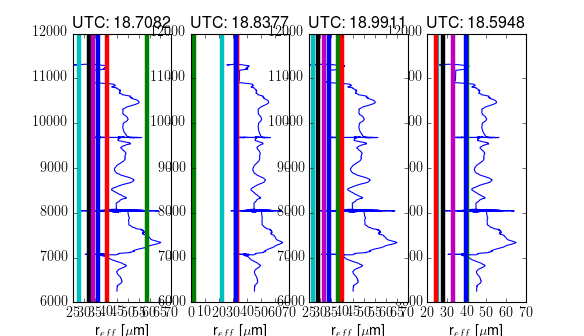

In [49]:
plt.figure()
for i,t in enumerate(tt):
    ax = plt.subplot(1,4,i)
    ax.plot(smooth(twoDS['effectiveD'][fl]/2.0,30),dc8['G_ALT'][fl],label='Cloud Probes (2DS)')
    ax.axvline(emas_ref_full[ie[i]],color='k',label='eMAS',lw=4)
    ax.axvline(rsp_ref[ir[i]],color='c',label='RSP',lw=4)
    ax.axvline(ssfr_ref[iss[i]],color='g',label='SSFR',lw=4)
    ax.axvline(modis_ref[im[i]],color='m',label='MODIS',lw=4)
    ax.axvline(star_ref[ist[i]],color='r',label='4STAR',lw=4)
    ax.axvline(goes_ref[ig[i]],color='b',label='GOES',lw=4)
    #ax.plot(smooth(apr['dbz'][:,iap[i]],20),apr['altflt'][:,iap[i]],label='APR-2')
    ax.set_title('UTC: {}'.format(t))
    if i==0:
        ax.set_ylabel('Altituce [m]')
    ax.set_xlabel('r$_{eff}$ [$\\mu$m]')
#plt.legend(frameon=True,loc=6)

### Update the plot with HVPS and FCDP

<IPython.core.display.Javascript object>


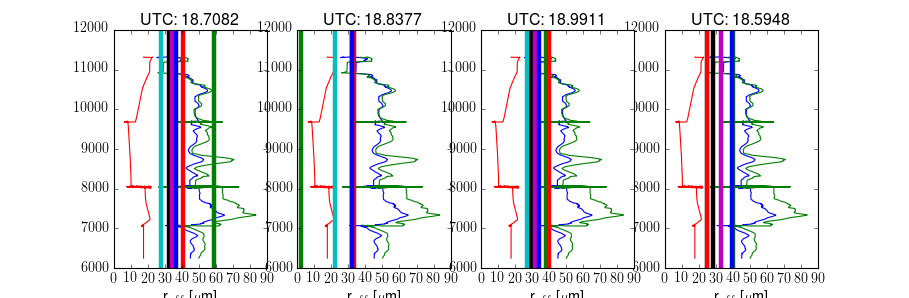

In [108]:
plt.figure()
for i,t in enumerate(tt):
    ax = plt.subplot(1,4,i)
    ax.plot(smooth(twoDS['effectiveD'][fl]/2.0,30),dc8['G_ALT'][fl],label='Cloud Probes (2DS)')
    ax.plot(smooth(hvps['effectiveD'][fl]/2.0,30),dc8['G_ALT'][fl],label='Cloud Probes (HVPS)')
    ax.plot(smooth(fcdp['effD'][fl]/2.0,30),dc8['G_ALT'][fl],label='Cloud Probes (FCDP)')
    ax.axvline(emas_ref_full[ie[i]],color='k',label='eMAS',lw=4)
    ax.axvline(rsp_ref[ir[i]],color='c',label='RSP',lw=4)
    ax.axvline(ssfr_ref[iss[i]],color='g',label='SSFR',lw=4)
    ax.axvline(modis_ref[im[i]],color='m',label='MODIS',lw=4)
    ax.axvline(star_ref[ist[i]],color='r',label='4STAR',lw=4)
    ax.axvline(goes_ref[ig[i]],color='b',label='GOES',lw=4)
    #ax.plot(smooth(apr['dbz'][:,iap[i]],20),apr['altflt'][:,iap[i]],label='APR-2')
    ax.set_title('UTC: {}'.format(t))
    if i==0:
        ax.set_ylabel('Altituce [m]')
    ax.set_xlabel('r$_{eff}$ [$\\mu$m]')

### Now bin the in situ cloud probes reff values

In [152]:
alt_bin_lims = np.linspace(6000,12000,16)

In [153]:
alt_pos = (alt_bin_lims[0:-1]+alt_bin_lims[1:])/2.0

In [154]:
fcdp_bins = []
twods_bins = []
hvps_bins = []
for i,c in enumerate(alt_bin_lims[0:-1]):
    alt_fl = (dc8['G_ALT'][fl]>=c)&(dc8['G_ALT'][fl]<alt_bin_lims[i+1])
    fcdp_bins.append(fcdp['effD'][fl][alt_fl]/2.0)
    twods_bins.append(twoDS['effectiveD'][fl][alt_fl]/2.0)
    hvps_bins.append(hvps['effectiveD'][fl][alt_fl]/2.0)

In [155]:
def color_box(bp, color):

    # Define the elements to color. You can also add medians, fliers and means
    elements = ['boxes','caps','whiskers','medians','means','fliers']

    # Iterate over each of the elements changing the color
    for elem in elements:
        [plt.setp(bp[elem][idx], color=color) for idx in xrange(len(bp[elem]))]
    return

<IPython.core.display.Javascript object>


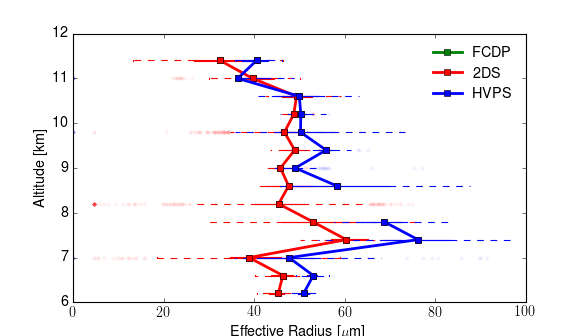

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111)
bo = ax.boxplot(fcdp_bins,0,'.',0,showmeans=True,positions=alt_pos,widths=3.0)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='green',label='FCDP',lw=2.5)

bo = ax.boxplot(twods_bins,0,'.',0,showmeans=True,positions=alt_pos,widths=10.0)
color_box(bo,'red')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='red',label='2DS',lw=2.5)

bo = ax.boxplot(hvps_bins,0,'.',0,showmeans=True,positions=alt_pos,widths=3.0)
color_box(bo,'blue')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='blue',label='HVPS',lw=2.5)

plt.legend(frameon=False,numpoints=1)
ax.set_ylim(6000,12000)
ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
tl = ax.set_yticklabels([6,7,8,9,10,11,12])
ax.set_ylabel('Altitude [km]')
ax.set_xlabel('Effective Radius [$\\mu$m]')

In [241]:
def plot_vert_cloud_probes(ax):
    bo = ax.boxplot(fcdp_bins,0,'.',0,showmeans=True,positions=alt_pos,widths=3.0)
    color_box(bo,'lightgrey')
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='lightgrey',label='FCDP',lw=2.0,alpha=0.6)

    bo = ax.boxplot(twods_bins,0,'.',0,showmeans=True,positions=alt_pos,widths=10.0)
    color_box(bo,'grey')
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='grey',label='2DS',lw=2.0,alpha=0.6)

    bo = ax.boxplot(hvps_bins,0,'.',0,showmeans=True,positions=alt_pos,widths=3.0)
    color_box(bo,'darkgrey')
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    plt.plot([a.get_xdata()[0] for a in bo['means']],alt_pos,'s-',zorder=100,color='darkgrey',label='HVPS',lw=2.0,alpha=0.6)

### Now plot at each time point, use averages for remote sensing

In [195]:
iie[0]

[136, 100]

In [213]:
emas_r,rsp_r,ssfr_r = np.zeros_like(tt),np.zeros_like(tt),np.zeros_like(tt)
modis_r,star_r,goes_r = np.zeros_like(tt),np.zeros_like(tt),np.zeros_like(tt)
for i,t in enumerate(tt):
    emas_r[i] = np.nanmean(emas_ref_full[iie[i][1]:iie[i][0]])
    rsp_r[i] = np.nanmean(rsp_ref[iir[i][1]:iir[i][0]])
    ssfr_r[i] = np.nanmean(ssfr_ref[iiss[i][1]:iiss[i][0]])
    modis_r[i] = np.nanmean(modis_ref[iim[i][1]:iim[i][0]])
    star_r[i] = np.nanmean(star_ref[iist[i][1]:iist[i][0]])
    goes_r[i] = np.nanmean(goes_ref[iig[i][1]:iig[i][0]])

In [222]:
for i,t in enumerate(tt):
    print i,t

0 18.5948
1 18.7082
2 18.8377
3 18.9911


<IPython.core.display.Javascript object>


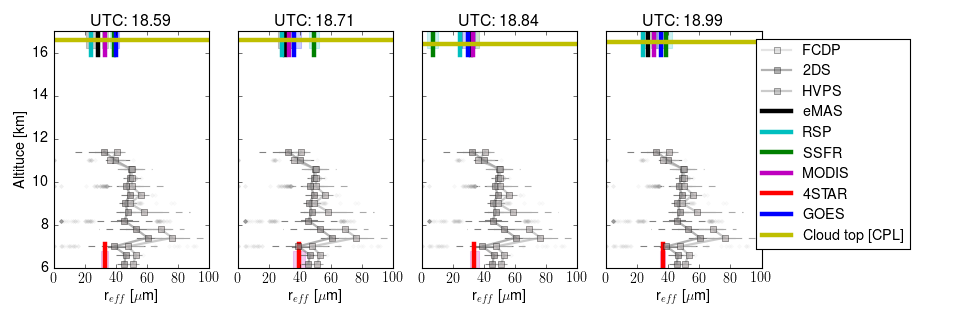

In [259]:
plt.figure(figsize=(12,4))
ax = plt.subplot(1,5,1)
#ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
#tl = ax.set_yticklabels([6,7,8,9,10,11,12])
for i,t in enumerate(tt):
    ax = plt.subplot(1,5,i+1,sharey=ax)
    plot_vert_cloud_probes(ax)
    
    ax.axvline(emas_r[i],ymin=0.9,ymax=1,color='k',label='eMAS',lw=4)
    ax.axvline(rsp_r[i],ymin=0.9,ymax=1,color='c',label='RSP',lw=4)    
    ax.axvline(ssfr_r[i],ymin=0.9,ymax=1,color='g',label='SSFR',lw=4)
    ax.axvline(modis_r[i],ymin=0.9,ymax=1,color='m',label='MODIS',lw=4)
    ax.axvline(star_r[i],ymin=0.0,ymax=0.1,color='r',label='4STAR',lw=4)
    ax.axvline(goes_r[i],ymin=0.9,ymax=1,color='b',label='GOES',lw=4)
    
    ax.axvspan(rsp_r[i]-rsp_ref_std[ir[i]]*2.0,rsp_r[i]+rsp_ref_std[ir[i]]*2.0,ymin=0.93,ymax=1.0,color='k',alpha=0.2)
    ax.axvspan(ssfr_r[i]-ssfr_ref_std[iss[i]]*2.0,ssfr_r[i]+ssfr_ref_std[iss[i]]*2.0,ymin=0.93,ymax=1.0,color='c',alpha=0.2)
    ax.axvspan(modis_r[i]-modis_ref_std[im[i]]*2.0,modis_r[i]+modis_ref_std[im[i]]*2.0,ymin=0.93,ymax=1.0,color='g',alpha=0.2)
    ax.axvspan(star_r[i]-star_ref_std[ist[i]]*2.0,star_r[i]+star_ref_std[ist[i]]*2.0,ymin=0.0,ymax=0.07,color='m',alpha=0.2)
    ax.axvspan(goes_r[i]-goes_ref_std[ig[i]]*2.0,goes_r[i]+goes_ref_std[ig[i]]*2.0,ymin=0.93,ymax=1.0,color='b',alpha=0.2)
    
    ax.axhline(cpl_layers['top'][ic[i]][0],color='y',label='Cloud top [CPL]',lw=4)
    
    #ax.plot(smooth(apr['dbz'][:,iap[i]],20),apr['altflt'][:,iap[i]],label='APR-2')
    ax.set_title('UTC: {:2.2f}'.format(t))
    if i==0:
        ax.set_ylabel('Altituce [km]')
        #ax.set_ylim(6000,12000)
        ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
        tl = ax.set_yticklabels([6,7,8,9,10,11,12])
    else: 
        #ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
        plt.setp(ax.get_yticklabels(), visible=False)
        
    ax.set_xlabel('r$_{eff}$ [$\\mu$m]')
ti = ax.set_yticks([6000,8000,10000,12000,14000,16000])
tl = ax.set_yticklabels([6,8,10,12,14,16])
ax.set_ylim(6000,17000)
plt.legend(frameon=True,bbox_to_anchor=[2.0,1],numpoints=1)
plt.tight_layout()
#plt.savefig(fp+'plots/20130913_vertical_profile_{vv}.png'.format(vv=vv),dpi=600,transparent=True)

## Checkout a possible retrieval using APR-2

In [ ]:
# using the empirical relationship between IWC and radar reflectiviyt from Ka band (35 Ghz) from Liao & Sassen, 1994
# IWC = 7.49*Z**0.78

In [264]:
apr.keys()

['altflt', 'lonz', 'dbz', 'utc', 'latz']

In [260]:
plt.figure(figsize=(12,4))
ax = plt.subplot(1,5,1)
#ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
#tl = ax.set_yticklabels([6,7,8,9,10,11,12])
for i,t in enumerate(tt):
    ax = plt.subplot(1,5,i+1,sharey=ax)
    plot_vert_cloud_probes(ax)
    
    plt.plot(cpl_layers['',cpl_layers['dbz'][ic[i]])
    
    
    
    ax.set_title('UTC: {:2.2f}'.format(t))
    if i==0:
        ax.set_ylabel('Altituce [km]')
        #ax.set_ylim(6000,12000)
        ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
        tl = ax.set_yticklabels([6,7,8,9,10,11,12])
    else: 
        #ti = ax.set_yticks([6000,7000,8000,9000,10000,11000,12000])
        plt.setp(ax.get_yticklabels(), visible=False)
        
    ax.set_xlabel('r$_{eff}$ [$\\mu$m]')
ti = ax.set_yticks([6000,8000,10000,12000,14000,16000])
tl = ax.set_yticklabels([6,8,10,12,14,16])
ax.set_ylim(6000,17000)
plt.legend(frameon=True,bbox_to_anchor=[2.0,1],numpoints=1)
plt.tight_layout()

['altflt', 'lonz', 'dbz', 'utc', 'latz']

In [ ]:
apr_